<a href="https://colab.research.google.com/github/aleynaozenc/aleynaozenc/blob/irem/nonlinear_oscillator_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

plt.style.use('seaborn-poster')

np.random.seed(1)
tf.random.set_seed(1)


# Hamiltonian Equation
def T(p):
  return (p**2)/2

def V(q):
  return ((q**2)/2) + ((q**4)/4)

def H(q,p):
  return T(p) + V(q)

def dV(q_0=tf.constant(1.0)):
  q_0 = tf.constant(q_0)
  with tf.GradientTape() as g:
    g.watch(q_0)
    y = V(q_0)
  return g.gradient(y, q_0)

def dT(p_0=tf.constant(1.0)):
  p_0 = tf.constant(p_0)
  with tf.GradientTape() as g:
    g.watch(p_0)
    y = T(p_0)
  return g.gradient(y, p_0)

def symplectic_euler(dT=dT, dV=dV ,h=0.1, initial_point= [0.9, 0.9]):

  t = np.arange(0.0, 4*np.math.pi, h)

  q = np.zeros(t.shape[0])
  p = np.zeros(t.shape[0])

  q[0] = initial_point[0]
  p[0] = initial_point[1]
  
  for i in range(0, t.shape[0]-1):

    q[i + 1] = q[i] + h * dT(p[i])
    p[i + 1] = p[i] - h * dV(q[i+1])
  
  z = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
  return z, t

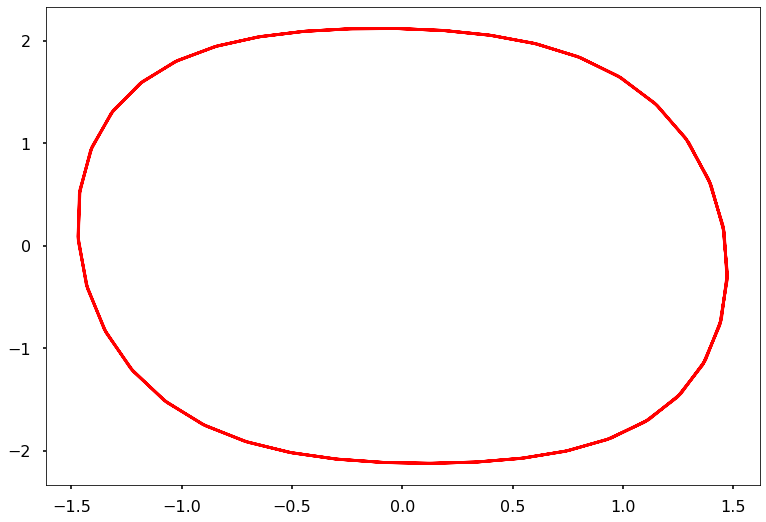

In [6]:
z, t = symplectic_euler(initial_point=[1.3,1.0])
plt.plot(z[:,0], z[:,1], c = "red")

In [3]:
dV(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

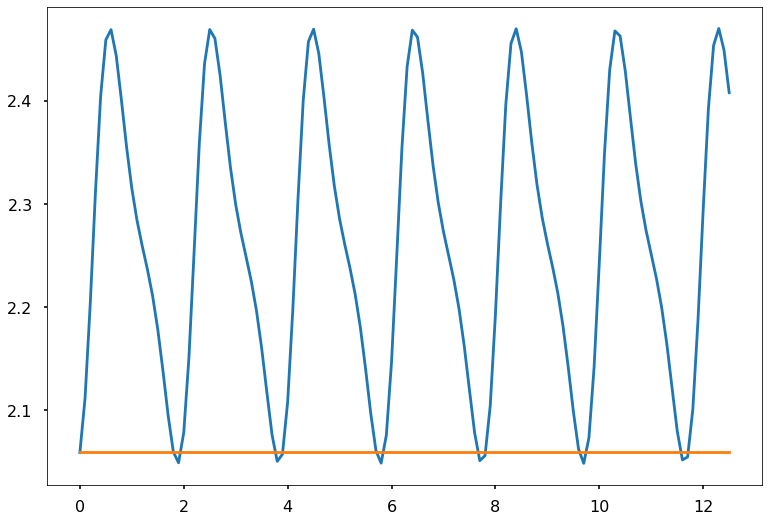

In [4]:
plt.plot(t,H(z[:,0], z[:,1]))
plt.plot(t,[2.06 for i in range(len(t))])

In [7]:
def f(u, t ,lam=1):
    x,  px = u      # unpack current values of u
    derivs = [px, -x - lam*x**3]     # list of derivatives
    return derivs
# Scipy Solver   
def NLosc_solution(N,t, x0,  px0, lam=1):
    u0 = [x0, px0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,))
    xP = solPend[:,0];        pxP = solPend[:,1];   
    return xP, pxP
# initial energy
def NLosc_exact(N,x0, px0, lam):
    E0 = 0.5*px0**2 + 0.5*x0**2 + lam*x0**4/4
    E_ex = E0*np.ones(N);
    return E0, E_ex

In [21]:
t0, t_max, N = 0., 4.*np.pi, 500 
dt = t_max/N
x0, px0,  lam =  1.3, 1., 1 
X0 = [t0, x0, px0, lam]
t_max_test = 1.0*t_max
nTest = 10*N 

In [22]:
def energy(x, px, lam=1):    
    Nx=len(x); 
    x=x.reshape(Nx);        px=px.reshape(Nx);    
    E = 0.5*px**2 + 0.5*x**2 + lam*x**4/4
    E = E.reshape(Nx)
    return E

In [23]:
t_num = np.linspace(t0, t_max_test, nTest)
E0, E_ex = NLosc_exact(nTest,x0, px0, lam)
x_num,  px_num  = NLosc_solution(nTest ,t_num, x0,  px0,  lam)
E_num = energy( x_num,  px_num, lam)

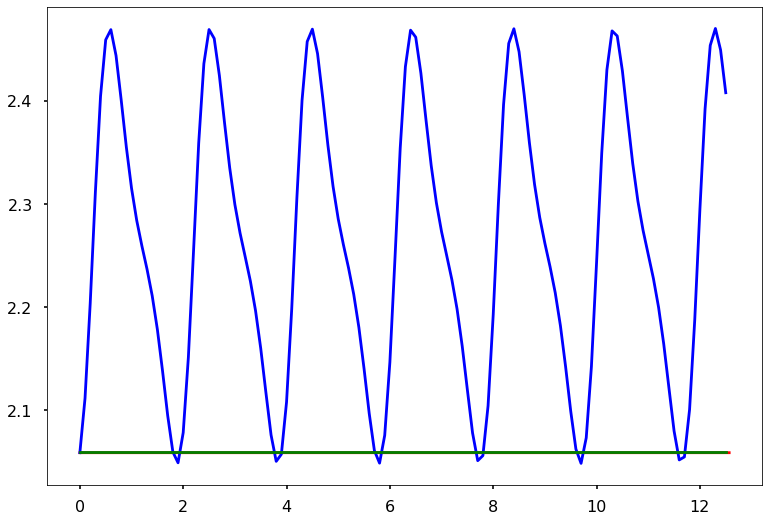

In [24]:
plt.plot(t_num,E_ex,'-g', label='Ground truth', c= 'red')
plt.plot(t,H(z[:,0], z[:,1]), c='blue')
plt.plot(t,[2.06 for i in range(len(t))], c='green')
